In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Text(0, 0.5, 'Доход')

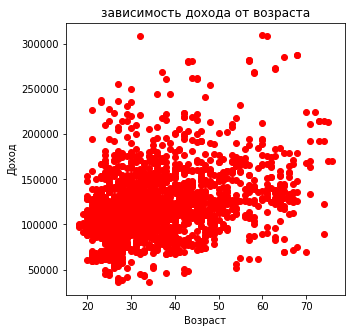

In [5]:
#№1
data= 'https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv'
file = pd.read_csv(data)

plt.figure(figsize=(5, 5))
plt.scatter(file["Age"], file["Income"], c = 'r')
plt.title('зависимость дохода от возраста')
plt.xlabel("Возраст")
plt.ylabel("Доход")
#возраст большинства клиентов 20-40 лет, доход большинства лежит в пределах 50000-200000

Text(0.5, 6.79999999999999, 'count')

<Figure size 576x576 with 0 Axes>

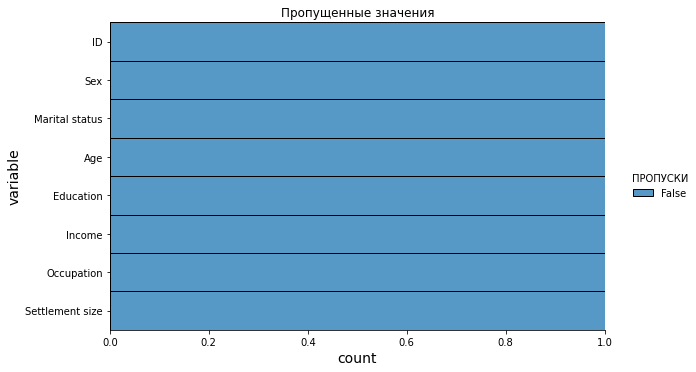

In [7]:
#№2
plt.figure(figsize=(8,8))
sns.displot(
    data=file.isna().melt(value_name="ПРОПУСКИ"),
    y="variable",
    hue="ПРОПУСКИ",
    multiple="fill",
    aspect=1.75
)
plt.title('Пропущенные значения')
plt.ylabel('variable',fontsize=14)
plt.xlabel('count',fontsize=14)
#пустых значений нет

<function matplotlib.pyplot.show(*args, **kw)>

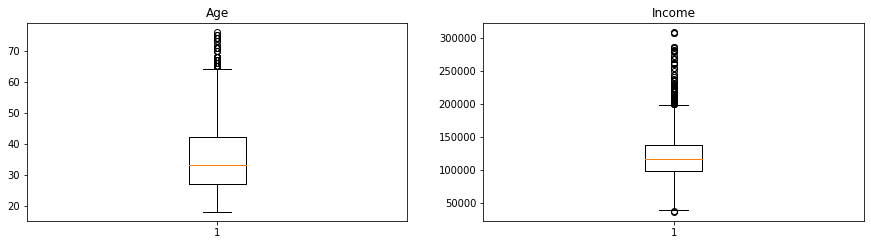

In [16]:
#№3
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.boxplot(file['Age'])
plt.title('Age')
plt.subplot(2, 2, 2)
plt.boxplot(file['Income'])
plt.title('Income')
plt.show
#вбросы: люди старше 60; люди,зарабатывающие менее 30000 или более 200000

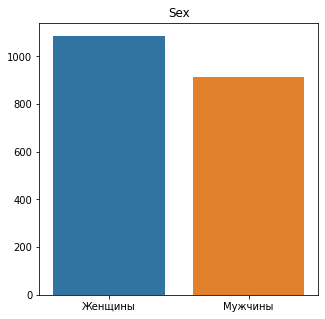

In [23]:
#4
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.barplot(data = file, x = ['Женщины', 'Мужчины'] , y = [file.Sex.value_counts()[0], file.Sex.value_counts()[1]])
ax.set_title("Sex")
plt.show()
#женщин больше,чем мужчин

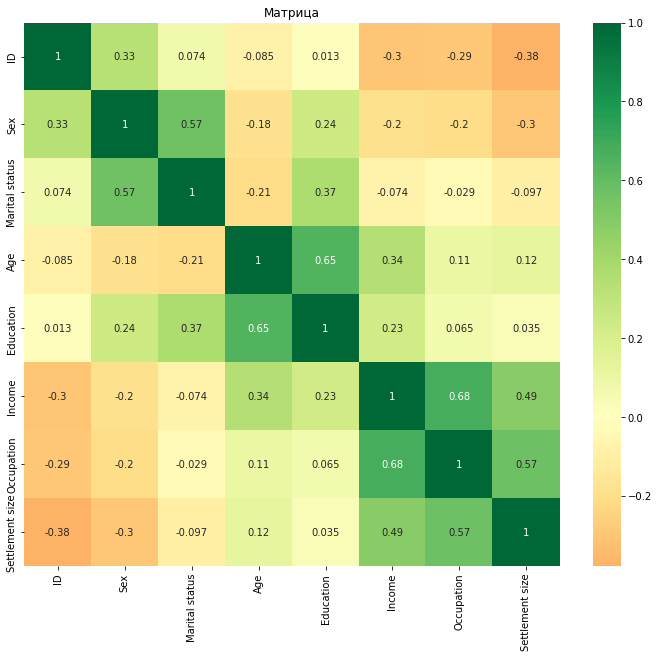

In [24]:
#5
plt.figure(figsize=(12,10))
sns.heatmap(file.corr(), xticklabels=file.corr().columns, yticklabels=file.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица')
plt.show()

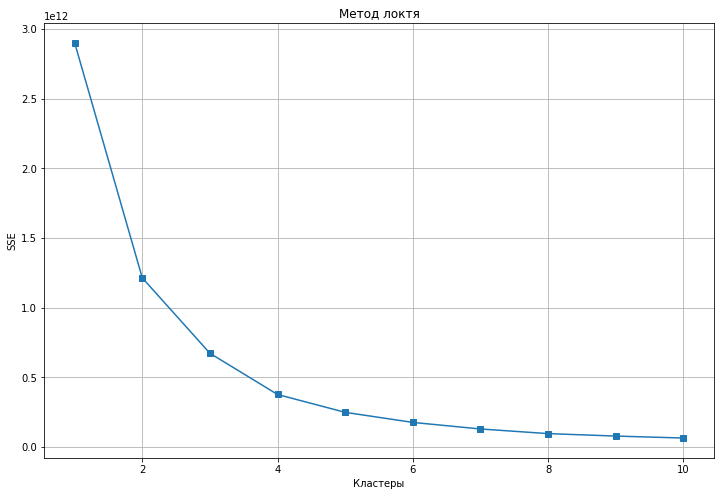

In [27]:
#Задание 2
from sklearn.cluster import KMeans
bow = file.loc[:, ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

SSE = []
plt.figure(figsize=(12, 8))
plt.grid()
plt.title("Метод локтя")
for i in range(1, 11):
  bus = KMeans(i)
  bus.fit(bow)
  SSE.append(bus.inertia_)
plt.plot(range(1, 11), SSE, marker = 's')
plt.xlabel("Кластеры")
plt.ylabel("SSE")
plt.show()

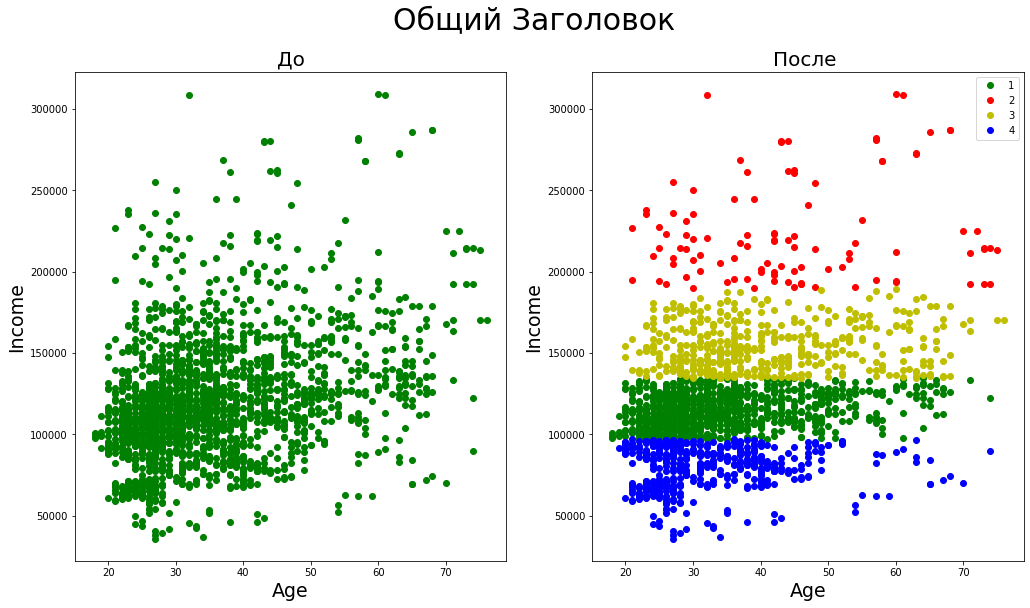

In [35]:
X = file.loc[:,['Age','Income']]
n=4
kmeans = KMeans(n_clusters=n)
kmeans.fit(X)
Y_pred = kmeans.labels_

     

kmeans = KMeans(n_clusters=4)
kmeans.fit(file)
file['cluster'] = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(17,9))

fig.suptitle('Общий Заголовок',fontsize = 30)
axes[0].plot(file['Age'], file['Income'], 'go')
axes[0].set_xlabel('Age',fontsize=19)
axes[0].set_ylabel('Income',fontsize=19)
axes[0].set_title("До",fontsize=20)

axes[1].set_xlabel('Age',fontsize=19)
axes[1].set_ylabel('Income',fontsize=19)
axes[1].set_title("После ",fontsize=20)
axes[1].plot(file[file['cluster']==0]['Age'], file[file['cluster']==0]['Income'], 'go', label='1')
axes[1].plot(file[file['cluster']==1]['Age'], file[file['cluster']==1]['Income'], 'ro', label='2')
axes[1].plot(file[file['cluster']==2]['Age'], file[file['cluster']==2]['Income'], 'yo', label='3')
axes[1].plot(file[file['cluster']==3]['Age'], file[file['cluster']==3]['Income'], 'bo', label='4')

plt.legend(loc=0)
plt.show()

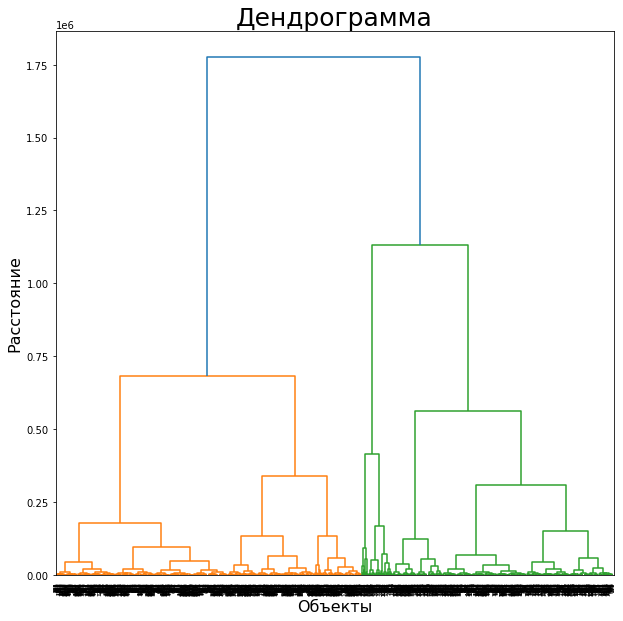

In [36]:
#Задание 3
X = file.iloc[:,:-1]
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'ward')

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.title("Дендрограмма",fontsize=25)
plt.xlabel("Объекты",fontsize=16)
plt.ylabel("Расстояние",fontsize=16)
plt.show()
#оптимально 4 кластера

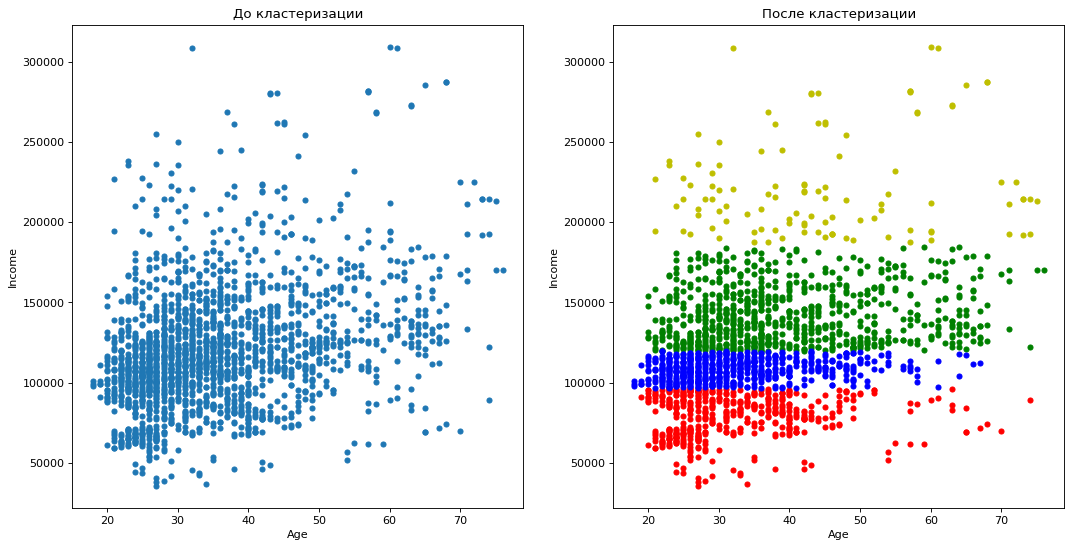

In [37]:
from sklearn.cluster import AgglomerativeClustering

Df = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_Df = Df.fit_predict(X)
X['pred_sklearn'] = y_Df

fig, ax = plt.subplots(1, 2, figsize=(16, 8), dpi = 80)

ax[0].set_title("До кластеризации")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Income")
ax[0].scatter(file['Age'], file['Income'], s = 20)

ax[1].set_title("После кластеризации")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Income")
ax[1].scatter(X.loc[y_Df==0, 'Age'], X.loc[y_Df==0, 'Income'], s=20, marker='o', color='g')
ax[1].scatter(X.loc[y_Df==1, 'Age'], X.loc[y_Df==1, 'Income'], s=20, marker='o', color='r')
ax[1].scatter(X.loc[y_Df==2, 'Age'], X.loc[y_Df==2, 'Income'], s=20, marker='o', color='y')
ax[1].scatter(X.loc[y_Df==3, 'Age'], X.loc[y_Df==3, 'Income'], s=20, marker='o', color='b')

plt.show()
